In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import random

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_excel('Training_Data.xlsx',inplace=True)
df

,PatientId,EncounterId,DischargeDisposision,Gender,Race,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,...,BetaBlockers,Diuretics,TotalMedicine,CardiacTroponin,Hemoglobin,SerumSodium,SerumCreatinine,BNP,NT-proBNP,ReadmissionWithin_90Days
0,4200412,199171333,Home,Male,White,DM,NaN,Anemia,NaN,COPD,...,0,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,Yes
1,4055894,26704337,Home,Male,White,DM,CKD,Anemia,Depression,COPD,...,1,5,8,0.0,0.00,0.0,1.540000,0.0,0.0,No
2,4867407,60388216,Home,Male,White,DM,CKD,Anemia,NaN,COPD,...,1,1,2,0.0,10.20,0.0,0.000000,0.0,0.0,No
3,4058064,274642265,Hospice - Home,Female,White,DM,NaN,Anemia,NaN,COPD,...,0,0,0,0.0,0.00,132.0,0.000000,0.0,0.0,No
4,4150623,70000001557327,SNF,Female,White,NaN,NaN,Anemia,NaN,COPD,...,0,0,0,0.0,7.26,0.0,0.000000,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,4152524,40004415567,Home Health,Female,White,DM,CKD,Anemia,NaN,COPD,...,2,3,6,0.0,0.00,0.0,1.076667,0.0,0.0,Yes
8477,4042227,14347947026,SNF,Male,White,DM,CKD,NaN,Depression,COPD,...,0,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,Yes
8478,4603405,67117733,Hospice,Female,White,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0.0,0.00,0.0,0.000000,0.0,0.0,No
8479,4033677,68564389,Home,Female,White,DM,CKD,NaN,Depression,NaN,...,1,1,5,0.0,0.00,0.0,1.690000,0.0,0.0,Yes


In [6]:
df.head().T

,0,1,2,3,4
PatientId,4200412,4055894,4867407,4058064,4150623
EncounterId,199171333,26704337,60388216,274642265,70000001557327
DischargeDisposision,Home,Home,Home,Hospice - Home,SNF
Gender,Male,Male,Male,Female,Female
Race,White,White,White,White,White
DiabetesMellitus,DM,DM,DM,DM,NaN
ChronicKidneyDisease,NaN,CKD,CKD,NaN,NaN
Anemia,Anemia,Anemia,Anemia,Anemia,Anemia
Depression,NaN,Depression,NaN,NaN,NaN
ChronicObstructivePulmonaryDisease,COPD,COPD,COPD,COPD,COPD


In [7]:
df.isnull().sum()

PatientId                                0
EncounterId                              0
DischargeDisposision                     0
Gender                                   0
Race                                    93
DiabetesMellitus                      3857
ChronicKidneyDisease                  3906
Anemia                                3002
Depression                            5108
ChronicObstructivePulmonaryDisease    3954
Age                                      0
ChronicDiseaseCount                      0
LengthOfStay                             0
EmergencyVisit                           0
InpatientVisit                           0
OutpatientVisit                          0
TotalVisits                              0
BMIMin                                   0
BMIMax                                   0
BMIMedian                                0
BMIMean                                  0
BPDiastolicMin                           0
BPDiastolicMax                           0
BPDiastolic

In [8]:
df.dtypes

PatientId                               int64
EncounterId                            object
DischargeDisposision                   object
Gender                                 object
Race                                   object
DiabetesMellitus                       object
ChronicKidneyDisease                   object
Anemia                                 object
Depression                             object
ChronicObstructivePulmonaryDisease     object
Age                                     int64
ChronicDiseaseCount                     int64
LengthOfStay                            int64
EmergencyVisit                          int64
InpatientVisit                          int64
OutpatientVisit                         int64
TotalVisits                             int64
BMIMin                                float64
BMIMax                                float64
BMIMedian                             float64
BMIMean                               float64
BPDiastolicMin                    

# Data Preprocessing

In [9]:
def Preprocessing(df):
    df['Race']=df['Race'].fillna('White')
    df['ChronicKidneyDisease']=df['ChronicKidneyDisease'].fillna('UnKnown')
    df['DiabetesMellitus']=df['DiabetesMellitus'].fillna('UnKnown')
    df['Anemia']=df['Anemia'].fillna('UnKnown')
    df['ChronicObstructivePulmonaryDisease']=df['ChronicObstructivePulmonaryDisease'].fillna('UnKnown')
    df['Depression ']=df['Depression '].fillna('UnKnown')
    df['EncounterId'] = df['EncounterId'].astype(str)
    #removing PH string from encounterid
    df['EncounterId'] = df['EncounterId'].map(lambda rmv: rmv.lstrip('PH'))
    df['EncounterId'] = df['EncounterId'].map(lambda rmv: rmv.lstrip('W'))
    df['EncounterId'] = df['EncounterId'].map(lambda rmv: rmv.lstrip('V'))
    df['EncounterId'] = df['EncounterId'].map(lambda rmv: rmv.lstrip('D'))

In [10]:
Preprocessing(df)

In [11]:
df

,PatientId,EncounterId,DischargeDisposision,Gender,Race,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,...,BetaBlockers,Diuretics,TotalMedicine,CardiacTroponin,Hemoglobin,SerumSodium,SerumCreatinine,BNP,NT-proBNP,ReadmissionWithin_90Days
0,4200412,199171333,Home,Male,White,DM,UnKnown,Anemia,UnKnown,COPD,...,0,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,Yes
1,4055894,26704337,Home,Male,White,DM,CKD,Anemia,Depression,COPD,...,1,5,8,0.0,0.00,0.0,1.540000,0.0,0.0,No
2,4867407,60388216,Home,Male,White,DM,CKD,Anemia,UnKnown,COPD,...,1,1,2,0.0,10.20,0.0,0.000000,0.0,0.0,No
3,4058064,274642265,Hospice - Home,Female,White,DM,UnKnown,Anemia,UnKnown,COPD,...,0,0,0,0.0,0.00,132.0,0.000000,0.0,0.0,No
4,4150623,70000001557327,SNF,Female,White,UnKnown,UnKnown,Anemia,UnKnown,COPD,...,0,0,0,0.0,7.26,0.0,0.000000,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,4152524,40004415567,Home Health,Female,White,DM,CKD,Anemia,UnKnown,COPD,...,2,3,6,0.0,0.00,0.0,1.076667,0.0,0.0,Yes
8477,4042227,14347947026,SNF,Male,White,DM,CKD,UnKnown,Depression,COPD,...,0,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,Yes
8478,4603405,67117733,Hospice,Female,White,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,...,1,0,1,0.0,0.00,0.0,0.000000,0.0,0.0,No
8479,4033677,68564389,Home,Female,White,DM,CKD,UnKnown,Depression,UnKnown,...,1,1,5,0.0,0.00,0.0,1.690000,0.0,0.0,Yes


# Creating Population

In [12]:
df.columns

Index(['PatientId', 'EncounterId', 'DischargeDisposision', 'Gender', 'Race',
       'DiabetesMellitus', 'ChronicKidneyDisease', 'Anemia', 'Depression ',
       'ChronicObstructivePulmonaryDisease', 'Age', 'ChronicDiseaseCount',
       'LengthOfStay', 'EmergencyVisit', 'InpatientVisit', 'OutpatientVisit',
       'TotalVisits', 'BMIMin', 'BMIMax', 'BMIMedian', 'BMIMean',
       'BPDiastolicMin', 'BPDiastolicMax', 'BPDiastolicMedian',
       'BPDiastolicMean', 'BPSystolicMin', 'BPSystolicMax', 'BPSystolicMedian',
       'BPSystolicMean', 'TemperatureMin', 'TemperatureMax',
       'TemperatureMedian', 'TemperatureMean', 'HeartRateMin', 'HeartRateMax',
       'HeartRateMedian', 'HeartRateMean', 'PulseRateMin', 'PulseRateMax',
       'PulseRateMedian', 'PulseRateMean', 'RespiratoryRateMin',
       'RespiratoryRateMax', 'RespiratoryRateMedian', 'RespiratoryRateMean',
       'ACEInhibitors', 'ARBs', 'BetaBlockers', 'Diuretics', 'TotalMedicine',
       'CardiacTroponin', 'Hemoglobin', 'SerumSod

In [13]:
df['ReadmissionWithin_90Days'].unique

<bound method Series.unique of 0       Yes
1        No
2        No
3        No
4        No
       ... 
8476    Yes
8477    Yes
8478     No
8479    Yes
8480     No
Name: ReadmissionWithin_90Days, Length: 8481, dtype: object>

In [14]:
population=[]

In [15]:
cols=df.columns.to_list()
cols.remove("ReadmissionWithin_90Days")
cols

['PatientId',
 'EncounterId',
 'DischargeDisposision',
 'Gender',
 'Race',
 'DiabetesMellitus',
 'ChronicKidneyDisease',
 'Anemia',
 'Depression ',
 'ChronicObstructivePulmonaryDisease',
 'Age',
 'ChronicDiseaseCount',
 'LengthOfStay',
 'EmergencyVisit',
 'InpatientVisit',
 'OutpatientVisit',
 'TotalVisits',
 'BMIMin',
 'BMIMax',
 'BMIMedian',
 'BMIMean',
 'BPDiastolicMin',
 'BPDiastolicMax',
 'BPDiastolicMedian',
 'BPDiastolicMean',
 'BPSystolicMin',
 'BPSystolicMax',
 'BPSystolicMedian',
 'BPSystolicMean',
 'TemperatureMin',
 'TemperatureMax',
 'TemperatureMedian',
 'TemperatureMean',
 'HeartRateMin',
 'HeartRateMax',
 'HeartRateMedian',
 'HeartRateMean',
 'PulseRateMin',
 'PulseRateMax',
 'PulseRateMedian',
 'PulseRateMean',
 'RespiratoryRateMin',
 'RespiratoryRateMax',
 'RespiratoryRateMedian',
 'RespiratoryRateMean',
 'ACEInhibitors',
 'ARBs',
 'BetaBlockers',
 'Diuretics',
 'TotalMedicine',
 'CardiacTroponin',
 'Hemoglobin',
 'SerumSodium',
 'SerumCreatinine',
 'BNP',
 'NT-proBNP

In [16]:
#def Create_population():
#    cols=df.columns.to_list()
#    for i in range(0,40):
#        listt=list()
#        while(True):
#            listt=random.sample(cols,30)
#            if "ReadmissionWithin_90Days" in listt:
#                if len(np.unique(listt))== 30:
#                    if listt not in population:
#                        print(listt)
#                        break
#            population.append(listt)

In [17]:
def Create_population():
    for i in range(0,40):
        listt=list()
        for j in range(0,30):
            listt=random.sample(cols,30)
            if listt not in population:
                print(listt)
                break
        population.append(listt)

In [18]:
Create_population()

['Anemia', 'BPDiastolicMax', 'LengthOfStay', 'ChronicObstructivePulmonaryDisease', 'OutpatientVisit', 'BPSystolicMedian', 'BMIMax', 'BPSystolicMax', 'ACEInhibitors', 'HeartRateMax', 'TemperatureMin', 'TemperatureMax', 'NT-proBNP', 'TotalMedicine', 'TemperatureMean', 'Diuretics', 'DiabetesMellitus', 'ARBs', 'BPDiastolicMedian', 'HeartRateMedian', 'HeartRateMean', 'Race', 'PulseRateMean', 'PatientId', 'BMIMean', 'BPDiastolicMean', 'EncounterId', 'RespiratoryRateMean', 'Depression ', 'RespiratoryRateMax']
['RespiratoryRateMean', 'BPSystolicMedian', 'BMIMedian', 'BPDiastolicMax', 'Hemoglobin', 'HeartRateMean', 'Gender', 'HeartRateMin', 'SerumSodium', 'HeartRateMax', 'Diuretics', 'ChronicKidneyDisease', 'BPSystolicMax', 'RespiratoryRateMedian', 'BMIMax', 'InpatientVisit', 'DischargeDisposision', 'EmergencyVisit', 'RespiratoryRateMax', 'Age', 'BPSystolicMean', 'BetaBlockers', 'PulseRateMedian', 'Depression ', 'TemperatureMedian', 'NT-proBNP', 'Anemia', 'EncounterId', 'TotalMedicine', 'BPDias

# Fitness Function

In [19]:
#creating temporary dataframe
tempdf=pd.read_excel('Training_Data.xlsx',inplace=True)
tempdf

,PatientId,EncounterId,DischargeDisposision,Gender,Race,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,...,BetaBlockers,Diuretics,TotalMedicine,CardiacTroponin,Hemoglobin,SerumSodium,SerumCreatinine,BNP,NT-proBNP,ReadmissionWithin_90Days
0,4200412,199171333,Home,Male,White,DM,NaN,Anemia,NaN,COPD,...,0,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,Yes
1,4055894,26704337,Home,Male,White,DM,CKD,Anemia,Depression,COPD,...,1,5,8,0.0,0.00,0.0,1.540000,0.0,0.0,No
2,4867407,60388216,Home,Male,White,DM,CKD,Anemia,NaN,COPD,...,1,1,2,0.0,10.20,0.0,0.000000,0.0,0.0,No
3,4058064,274642265,Hospice - Home,Female,White,DM,NaN,Anemia,NaN,COPD,...,0,0,0,0.0,0.00,132.0,0.000000,0.0,0.0,No
4,4150623,70000001557327,SNF,Female,White,NaN,NaN,Anemia,NaN,COPD,...,0,0,0,0.0,7.26,0.0,0.000000,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,4152524,40004415567,Home Health,Female,White,DM,CKD,Anemia,NaN,COPD,...,2,3,6,0.0,0.00,0.0,1.076667,0.0,0.0,Yes
8477,4042227,14347947026,SNF,Male,White,DM,CKD,NaN,Depression,COPD,...,0,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,Yes
8478,4603405,67117733,Hospice,Female,White,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0.0,0.00,0.0,0.000000,0.0,0.0,No
8479,4033677,68564389,Home,Female,White,DM,CKD,NaN,Depression,NaN,...,1,1,5,0.0,0.00,0.0,1.690000,0.0,0.0,Yes


In [20]:
Preprocessing(tempdf)

In [21]:
tempdf.head()

,PatientId,EncounterId,DischargeDisposision,Gender,Race,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,...,BetaBlockers,Diuretics,TotalMedicine,CardiacTroponin,Hemoglobin,SerumSodium,SerumCreatinine,BNP,NT-proBNP,ReadmissionWithin_90Days
0,4200412,199171333,Home,Male,White,DM,UnKnown,Anemia,UnKnown,COPD,...,0,0,0,0.0,0.00,0.0,0.00,0.0,0.0,Yes
1,4055894,26704337,Home,Male,White,DM,CKD,Anemia,Depression,COPD,...,1,5,8,0.0,0.00,0.0,1.54,0.0,0.0,No
2,4867407,60388216,Home,Male,White,DM,CKD,Anemia,UnKnown,COPD,...,1,1,2,0.0,10.20,0.0,0.00,0.0,0.0,No
3,4058064,274642265,Hospice - Home,Female,White,DM,UnKnown,Anemia,UnKnown,COPD,...,0,0,0,0.0,0.00,132.0,0.00,0.0,0.0,No
4,4150623,70000001557327,SNF,Female,White,UnKnown,UnKnown,Anemia,UnKnown,COPD,...,0,0,0,0.0,7.26,0.0,0.00,0.0,0.0,No


In [22]:
labelencoder=LabelEncoder()

In [23]:
tempdf['DischargeDisposision']=labelencoder.fit_transform(tempdf['DischargeDisposision'])
tempdf['Gender']=labelencoder.fit_transform(tempdf['Gender'])
tempdf['Race']=labelencoder.fit_transform(tempdf['Race'])
tempdf['DiabetesMellitus']=labelencoder.fit_transform(tempdf['DiabetesMellitus'])
tempdf['ChronicKidneyDisease']=labelencoder.fit_transform(tempdf['ChronicKidneyDisease'])
tempdf['Anemia']=labelencoder.fit_transform(tempdf['Anemia'])
tempdf['Depression ']=labelencoder.fit_transform(tempdf['Depression '])
tempdf['ChronicObstructivePulmonaryDisease']=labelencoder.fit_transform(tempdf['ChronicObstructivePulmonaryDisease'])
tempdf['ReadmissionWithin_90Days']=labelencoder.fit_transform(tempdf['ReadmissionWithin_90Days'])
tempdf.head()

,PatientId,EncounterId,DischargeDisposision,Gender,Race,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,...,BetaBlockers,Diuretics,TotalMedicine,CardiacTroponin,Hemoglobin,SerumSodium,SerumCreatinine,BNP,NT-proBNP,ReadmissionWithin_90Days
0,4200412,199171333,7,1,6,0,1,0,1,0,...,0,0,0,0.0,0.00,0.0,0.00,0.0,0.0,1
1,4055894,26704337,7,1,6,0,0,0,0,0,...,1,5,8,0.0,0.00,0.0,1.54,0.0,0.0,0
2,4867407,60388216,7,1,6,0,0,0,1,0,...,1,1,2,0.0,10.20,0.0,0.00,0.0,0.0,0
3,4058064,274642265,11,0,6,0,1,0,1,0,...,0,0,0,0.0,0.00,132.0,0.00,0.0,0.0,0
4,4150623,70000001557327,19,0,6,1,1,0,1,0,...,0,0,0,0.0,7.26,0.0,0.00,0.0,0.0,0


In [24]:
tempdf[population[0]]

,Anemia,BPDiastolicMax,LengthOfStay,ChronicObstructivePulmonaryDisease,OutpatientVisit,BPSystolicMedian,BMIMax,BPSystolicMax,ACEInhibitors,HeartRateMax,...,HeartRateMean,Race,PulseRateMean,PatientId,BMIMean,BPDiastolicMean,EncounterId,RespiratoryRateMean,Depression,RespiratoryRateMax
0,0,0,3,0,21,0.0,51.48,0,0,0,...,0.000000,6,0.000000,4200412,51.48,0.000000,199171333,0.000000,1,0
1,0,78,6,0,0,106.0,31.74,150,2,89,...,68.000000,6,0.000000,4055894,31.74,63.052632,26704337,17.833333,0,22
2,0,0,8,0,0,0.0,0.00,0,0,0,...,0.000000,6,0.000000,4867407,0.00,0.000000,60388216,0.000000,1,0
3,0,115,4,0,0,182.0,20.55,182,0,0,...,0.000000,6,0.000000,4058064,20.55,115.000000,274642265,22.000000,1,22
4,0,72,3,0,0,122.5,0.00,159,0,0,...,0.000000,6,91.476190,4150623,0.00,59.044118,70000001557327,17.000000,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,0,97,21,0,0,121.5,43.41,195,0,144,...,99.633333,6,0.000000,4152524,43.41,68.277778,40004415567,32.885714,1,107
8477,1,0,19,0,0,0.0,0.00,0,0,0,...,0.000000,6,0.000000,4042227,0.00,0.000000,14347947026,0.000000,0,0
8478,1,94,12,1,0,146.5,0.00,195,0,0,...,0.000000,6,111.863636,4603405,0.00,78.473684,67117733,14.904762,1,22
8479,1,121,3,1,0,153.0,0.00,185,3,0,...,0.000000,6,79.666667,4033677,0.00,93.875000,68564389,16.875000,0,18


In [25]:
fitness_score=[]

In [26]:
lg = LogisticRegression()

In [27]:
def Fitness_function(col):
    #cols=population[i]
    #print(tempdf[col])
    X=tempdf[col]
    Y=tempdf['ReadmissionWithin_90Days']
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     Y, test_size=0.25, 
                                                     random_state=1)
    lg.fit(X_train,y_train)
    pred = lg.predict(X_test)
    print("Accuracy = "+ str(accuracy_score(y_test,pred)*100))
    fitness_score.append(accuracy_score(y_test,pred)*100)
    #    print(fitness_score)
    

In [28]:
for i in population:
    Fitness_function(i)
    

Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.28712871287128
Accuracy = 71.23998114097124
Accuracy = 73.5973597359736
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 72.18293257897218
Accuracy = 71.23998114097124
Accuracy = 73.36162187647336
Accuracy = 71.23998114097124
Accuracy = 71.0985384252711
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 71.23998114097124
Accuracy = 70.24

In [29]:
fitness_score

[71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.28712871287128,
 71.23998114097124,
 73.5973597359736,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 72.18293257897218,
 71.23998114097124,
 73.36162187647336,
 71.23998114097124,
 71.0985384252711,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 71.23998114097124,
 70.24988213107025,
 71.23998114097124,
 71.23998114097124,
 72.23008015087224,
 72.84299858557284,
 71.23998114097124]

In [30]:
print(population[1])

['RespiratoryRateMean', 'BPSystolicMedian', 'BMIMedian', 'BPDiastolicMax', 'Hemoglobin', 'HeartRateMean', 'Gender', 'HeartRateMin', 'SerumSodium', 'HeartRateMax', 'Diuretics', 'ChronicKidneyDisease', 'BPSystolicMax', 'RespiratoryRateMedian', 'BMIMax', 'InpatientVisit', 'DischargeDisposision', 'EmergencyVisit', 'RespiratoryRateMax', 'Age', 'BPSystolicMean', 'BetaBlockers', 'PulseRateMedian', 'Depression ', 'TemperatureMedian', 'NT-proBNP', 'Anemia', 'EncounterId', 'TotalMedicine', 'BPDiastolicMedian']


In [31]:
tempdf[population[1]].head()

,RespiratoryRateMean,BPSystolicMedian,BMIMedian,BPDiastolicMax,Hemoglobin,HeartRateMean,Gender,HeartRateMin,SerumSodium,HeartRateMax,...,BPSystolicMean,BetaBlockers,PulseRateMedian,Depression,TemperatureMedian,NT-proBNP,Anemia,EncounterId,TotalMedicine,BPDiastolicMedian
0,0.000000,0.0,51.48,0,0.00,0.0,1,0,0.0,0,...,0.000000,0,0.0,1,0.00,0.0,0,199171333,0,0.0
1,17.833333,106.0,31.74,78,0.00,68.0,1,57,0.0,89,...,109.080000,1,0.0,0,98.25,0.0,0,26704337,8,63.0
2,0.000000,0.0,0.00,0,10.20,0.0,1,0,0.0,0,...,0.000000,1,0.0,1,0.00,0.0,0,60388216,2,0.0
3,22.000000,182.0,20.55,115,0.00,0.0,0,0,132.0,0,...,182.000000,0,0.0,1,97.70,0.0,0,274642265,0,115.0
4,17.000000,122.5,0.00,72,7.26,0.0,0,0,0.0,0,...,124.863636,0,93.0,1,97.88,0.0,0,70000001557327,0,60.0


# Selection

## Roulette's Wheel

In [32]:
import numpy.random as npr
def selection( fit):
    max = sum([c for c in fit])
    selection_probs = [c/max for c in fit]
    return fit.index(fit[npr.choice(len(fit), p=selection_probs)])

fitness_copy=deepcopy(fitness_score)
parent1=selection(fitness_copy)
parent2=selection(fitness_copy)
while parent1==parent2:
    parent2=selection(fitness_score)
    
print(parent1)
print(parent2)

In [33]:
def parentselect():
    fitness_copy=deepcopy(fitness_score)
    global parent1
    global parent2
    parent1=selection(fitness_copy)
    parent2=selection(fitness_copy)
    while parent1==parent2:
        parent2=selection(fitness_score)
    print(population[parent1])
    print(population[parent2])
    return parent1,parent2
    

    
    

In [34]:
parentselect()

['Anemia', 'BPDiastolicMax', 'LengthOfStay', 'ChronicObstructivePulmonaryDisease', 'OutpatientVisit', 'BPSystolicMedian', 'BMIMax', 'BPSystolicMax', 'ACEInhibitors', 'HeartRateMax', 'TemperatureMin', 'TemperatureMax', 'NT-proBNP', 'TotalMedicine', 'TemperatureMean', 'Diuretics', 'DiabetesMellitus', 'ARBs', 'BPDiastolicMedian', 'HeartRateMedian', 'HeartRateMean', 'Race', 'PulseRateMean', 'PatientId', 'BMIMean', 'BPDiastolicMean', 'EncounterId', 'RespiratoryRateMean', 'Depression ', 'RespiratoryRateMax']
['ACEInhibitors', 'TemperatureMedian', 'PulseRateMedian', 'RespiratoryRateMean', 'TemperatureMin', 'BPDiastolicMean', 'BetaBlockers', 'Race', 'BPSystolicMean', 'BPSystolicMin', 'HeartRateMean', 'BMIMedian', 'DiabetesMellitus', 'ChronicObstructivePulmonaryDisease', 'InpatientVisit', 'DischargeDisposision', 'BPDiastolicMedian', 'BPDiastolicMin', 'ChronicDiseaseCount', 'BPSystolicMax', 'SerumSodium', 'BMIMax', 'OutpatientVisit', 'PulseRateMax', 'LengthOfStay', 'Gender', 'PulseRateMin', 'Hea

(0, 15)

In [35]:
print(parent1)
print(parent2)

0
15


# Crossover

In [36]:
p1=population[parent1]
p2=population[parent2]

In [37]:
p1

['Anemia',
 'BPDiastolicMax',
 'LengthOfStay',
 'ChronicObstructivePulmonaryDisease',
 'OutpatientVisit',
 'BPSystolicMedian',
 'BMIMax',
 'BPSystolicMax',
 'ACEInhibitors',
 'HeartRateMax',
 'TemperatureMin',
 'TemperatureMax',
 'NT-proBNP',
 'TotalMedicine',
 'TemperatureMean',
 'Diuretics',
 'DiabetesMellitus',
 'ARBs',
 'BPDiastolicMedian',
 'HeartRateMedian',
 'HeartRateMean',
 'Race',
 'PulseRateMean',
 'PatientId',
 'BMIMean',
 'BPDiastolicMean',
 'EncounterId',
 'RespiratoryRateMean',
 'Depression ',
 'RespiratoryRateMax']

In [38]:
p2

['ACEInhibitors',
 'TemperatureMedian',
 'PulseRateMedian',
 'RespiratoryRateMean',
 'TemperatureMin',
 'BPDiastolicMean',
 'BetaBlockers',
 'Race',
 'BPSystolicMean',
 'BPSystolicMin',
 'HeartRateMean',
 'BMIMedian',
 'DiabetesMellitus',
 'ChronicObstructivePulmonaryDisease',
 'InpatientVisit',
 'DischargeDisposision',
 'BPDiastolicMedian',
 'BPDiastolicMin',
 'ChronicDiseaseCount',
 'BPSystolicMax',
 'SerumSodium',
 'BMIMax',
 'OutpatientVisit',
 'PulseRateMax',
 'LengthOfStay',
 'Gender',
 'PulseRateMin',
 'HeartRateMin',
 'Age',
 'TemperatureMean']

In [39]:
def crossover(par1,par2):
    #CHROMOSOMES
    #chromosomes=Create_population(deepcopy(population))   
    global child1
    global child2
    #CROSSOVER
    random_slice_index=np.random.randint(0,25)
    child1 = population[parent1][0:random_slice_index]+ population[parent2][random_slice_index:]
    child2 = population[parent2][0:random_slice_index]+ population[parent1][random_slice_index:]
    return child1,child2
    print(child1)
    print(child2)

In [40]:
#Print childs result of crossover
crossover(parent1,parent2)

(['Anemia',
  'BPDiastolicMax',
  'PulseRateMedian',
  'RespiratoryRateMean',
  'TemperatureMin',
  'BPDiastolicMean',
  'BetaBlockers',
  'Race',
  'BPSystolicMean',
  'BPSystolicMin',
  'HeartRateMean',
  'BMIMedian',
  'DiabetesMellitus',
  'ChronicObstructivePulmonaryDisease',
  'InpatientVisit',
  'DischargeDisposision',
  'BPDiastolicMedian',
  'BPDiastolicMin',
  'ChronicDiseaseCount',
  'BPSystolicMax',
  'SerumSodium',
  'BMIMax',
  'OutpatientVisit',
  'PulseRateMax',
  'LengthOfStay',
  'Gender',
  'PulseRateMin',
  'HeartRateMin',
  'Age',
  'TemperatureMean'],
 ['ACEInhibitors',
  'TemperatureMedian',
  'LengthOfStay',
  'ChronicObstructivePulmonaryDisease',
  'OutpatientVisit',
  'BPSystolicMedian',
  'BMIMax',
  'BPSystolicMax',
  'ACEInhibitors',
  'HeartRateMax',
  'TemperatureMin',
  'TemperatureMax',
  'NT-proBNP',
  'TotalMedicine',
  'TemperatureMean',
  'Diuretics',
  'DiabetesMellitus',
  'ARBs',
  'BPDiastolicMedian',
  'HeartRateMedian',
  'HeartRateMean',
  'R

# Mutation

In [41]:
#MUTATION
mutation_prob=np.random.randint(0,30)
mutation_threshold=80
if mutation_prob<=mutation_threshold:
    random_index=np.random.randint(0,30)
    col=tempdf.columns.to_list()
    #random1=random.sample(col,1)[0]
    #random2=random.sample(col,1)[0]
    child1[random_index]=random.sample(col,1)[0]
    child2[random_index]=random.sample(col,1)[0]
    print(child2)

['ACEInhibitors', 'TemperatureMedian', 'LengthOfStay', 'ChronicObstructivePulmonaryDisease', 'OutpatientVisit', 'BPSystolicMedian', 'BMIMax', 'BPSystolicMax', 'ACEInhibitors', 'HeartRateMax', 'TemperatureMin', 'TemperatureMax', 'NT-proBNP', 'TotalMedicine', 'TemperatureMean', 'Diuretics', 'DiabetesMellitus', 'ARBs', 'BPDiastolicMedian', 'HeartRateMedian', 'HeartRateMean', 'Race', 'PulseRateMean', 'PatientId', 'BMIMean', 'BPDiastolicMean', 'EncounterId', 'RespiratoryRateMean', 'Depression ', 'RespiratoryRateMax']


In [42]:
def mutation(c1,c2):                                        
    mutation_prob=np.random.randint(0,100)
    mutation_threshold=80
    if mutation_prob<=mutation_threshold:
        random_index=np.random.randint(0,30)
        c1_ri=np.random.randint(0,57)                  
        c1_rc=df.columns[c1_ri]
        while True:
            if c1_rc not in c1:
                c1_rc=df.columns[c1_ri]
                c1[random_index]=c1_rc
                print(c1)
                break
            else:
                c1_ri=np.random.randint(0,57)                  
                c1_rc=df.columns[c1_ri]
                #print(c1_rc)
                
                
        c2_ri=np.random.randint(0,57)
        c2_rc=df.columns[c2_ri]
        c2[random_index]=c2_rc
        while True:
            if c2_rc not in c2:
                c2_rc=df.columns[c2_ri]
                c2[random_index]=c2_rc
                print(c2)
                break
            else:
                c2_ri=np.random.randint(0,57)    
                c2_rc=df.columns[c2_ri]
                #print(c2_rc)
        
    
    child1_fitness=Fitness_function(c1)
    child2_fitness=Fitness_function(c2)

    return(child1_fitness,child2_fitness)
   

In [43]:
mutation(child1,child2)

['Anemia', 'BPDiastolicMax', 'PulseRateMedian', 'RespiratoryRateMean', 'TemperatureMin', 'BPDiastolicMean', 'BetaBlockers', 'Race', 'BPSystolicMean', 'BPSystolicMin', 'HeartRateMean', 'BMIMedian', 'DiabetesMellitus', 'ChronicObstructivePulmonaryDisease', 'InpatientVisit', 'DischargeDisposision', 'BPDiastolicMedian', 'TemperatureMedian', 'ChronicDiseaseCount', 'BPSystolicMax', 'SerumSodium', 'PulseRateMean', 'OutpatientVisit', 'PulseRateMax', 'LengthOfStay', 'Gender', 'PulseRateMin', 'HeartRateMin', 'Age', 'TemperatureMean']
['ACEInhibitors', 'TemperatureMedian', 'LengthOfStay', 'ChronicObstructivePulmonaryDisease', 'OutpatientVisit', 'BPSystolicMedian', 'BMIMax', 'BPSystolicMax', 'ACEInhibitors', 'HeartRateMax', 'TemperatureMin', 'TemperatureMax', 'NT-proBNP', 'TotalMedicine', 'TemperatureMean', 'Diuretics', 'DiabetesMellitus', 'ChronicKidneyDisease', 'BPDiastolicMedian', 'HeartRateMedian', 'HeartRateMean', 'Race', 'PulseRateMean', 'PatientId', 'BMIMean', 'BPDiastolicMean', 'EncounterI

(None, None)

In [44]:
indx1=17 

#Doing interchanging in mutation
def mutation(parent1,parent2):
    n = len(parent1)
    pos_1 = random.randint(0,n-1)
    pos_2 = random.randint(0,n-1)
    #print(pos_1, pos_2)
    def swap(sol, posA, posB):
        result = sol.copy()
        elA = sol[posA]
        elB = sol[posB]
        result[posA] = elB
        result[posB] = elA
        return result
    global child1_m
    global child2_m
    child1_m = swap(parent1, pos_1, pos_2)
    child2_m = swap(parent2, pos_1, pos_2)
    return child1_m,child2_m

# Final Result

## Accuracy With All Features

In [45]:
def Fitness_function1():
    #cols=population[i]
    X=tempdf.drop('ReadmissionWithin_90Days',1)
    Y=tempdf['ReadmissionWithin_90Days']
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     Y, test_size=0.25, 
                                                     random_state=1)
    lg.fit(X_train,y_train)
    pred = lg.predict(X_test)
    print("Accuracy = "+ str(accuracy_score(y_test,pred)*100))
    return accuracy_score(y_test,pred)*100
    #fitness_score.append(accuracy_score(y_test,pred)*100)
    #    print(fitness_score)
    

In [46]:
without = Fitness_function1()

Accuracy = 71.23998114097124


## Accuracy After Applying GA

In [47]:
epoch=100
while(max(fitness_score) != 74 and epoch!=0):
    #Selection of Parent's using roulette's wheel
    #parentselect()
    parent1=selection(fitness_score)
    parent2=selection(fitness_score)
    while parent1==parent2:
        parent2=selection(fitness_score)
    #Crossover
    crossover(parent1,parent2)
    while True:
        child1,child2=crossover(parent1,parent2)
        
        if len(np.unique(child1))==30 and len(np.unique(child2))==30:
            break
    #mutation
    #mutation(child1,child2)
    child1_fitness,child2_fitness=mutation(child1,child2)
    #Creating new dataframes with selected columns
    #newdf1=pd.DataFrame(df,columns=child1_m)
    #newdf2=pd.DataFrame(df,columns=child2_m)
    #Fitness score
    #score1=Fitness_function(child1_m)
    #score2=Fitness_function(child2_m)
    
    epoch=epoch-1
  
index=fitness_score.index(max(fitness_score))
print("Accuracy after running GA : ",max(fitness_score))

    
    

['ACEInhibitors', 'TemperatureMedian', 'PulseRateMedian', 'RespiratoryRateMean', 'PatientId', 'BPDiastolicMean', 'BetaBlockers', 'Race', 'BPSystolicMean', 'BPSystolicMin', 'HeartRateMean', 'BMIMedian', 'DiabetesMellitus', 'ChronicObstructivePulmonaryDisease', 'InpatientVisit', 'DischargeDisposision', 'BPDiastolicMedian', 'BPDiastolicMin', 'ChronicDiseaseCount', 'BPSystolicMax', 'SerumSodium', 'BMIMax', 'OutpatientVisit', 'PulseRateMax', 'LengthOfStay', 'Gender', 'PulseRateMin', 'HeartRateMin', 'Age', 'TemperatureMean']
['Anemia', 'BPDiastolicMax', 'LengthOfStay', 'ChronicObstructivePulmonaryDisease', 'OutpatientVisit', 'BPSystolicMedian', 'BMIMax', 'BPSystolicMax', 'ACEInhibitors', 'HeartRateMax', 'TemperatureMin', 'TemperatureMax', 'NT-proBNP', 'TotalMedicine', 'TemperatureMean', 'Diuretics', 'DiabetesMellitus', 'ARBs', 'BPDiastolicMedian', 'HeartRateMedian', 'HeartRateMean', 'Race', 'PulseRateMean', 'PatientId', 'BMIMean', 'BPDiastolicMean', 'EncounterId', 'RespiratoryRateMean', 'Dep

In [48]:
print("Features Selected by GA: ")
print(population[index]) 

Features Selected by GA: 
['ACEInhibitors', 'TemperatureMedian', 'PulseRateMedian', 'RespiratoryRateMean', 'TemperatureMin', 'BPDiastolicMean', 'BetaBlockers', 'Race', 'BPSystolicMean', 'BPSystolicMin', 'HeartRateMean', 'BMIMedian', 'DiabetesMellitus', 'ChronicObstructivePulmonaryDisease', 'InpatientVisit', 'DischargeDisposision', 'BPDiastolicMedian', 'BPDiastolicMin', 'ChronicDiseaseCount', 'BPSystolicMax', 'SerumSodium', 'BMIMax', 'OutpatientVisit', 'PulseRateMax', 'LengthOfStay', 'Gender', 'PulseRateMin', 'HeartRateMin', 'Age', 'TemperatureMean']


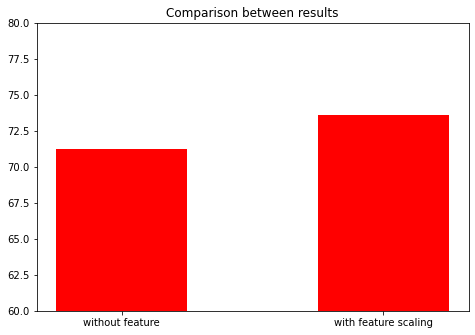

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(60,80)
ax.set_title("Comparison between results")
label = ['without feature', 'with feature scaling']
data = [without,max(fitness_score)]
ax.bar(label,data, color = 'red', width = 0.5)
plt.show()